<a href="https://colab.research.google.com/github/Dantelarroy/suplements-chatbot/blob/main/Supplements_chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Supplements Chatbot**


**Autor**: Dante Larroy  
**Fecha**: 18/12/2024  
**Fecha de Entrega**: 02/01/2025  

Resumen de Fechas:
- EDA y Preprocesamiento de Datos: `18/12 - 21/12`
- Desarrollo del Modelo de Sentimiento: `22/12 - 24/12`
- Desarrollo del Modelo de Clasificaci√≥n de T√≥picos: `26/12 - 28/12`
- Desarrollo de la Funci√≥n IA Generativa: `29/12 - 31/12`
- Pruebas, Evaluaci√≥n y Ajustes: `01/01 - 02/01`
- Entrega Final: `2/01/2025`

---

## **`Introducci√≥n`**
El objetivo de este desaf√≠o es aplicar tus conocimientos en DS e IA
Generativa para dise√±ar un prototipo funcional, que eventualmente se convierta
en un chatbot capaz de ofrecer soporte a usuarios en base a sus comentarios.
---
## **`Contexto`**
El cliente es una destacada empresa de venta de suplementos nutricionales en
l√≠nea.

- **`Problema`** Recientemente, se ha observado un aumento significativo en las rese√±as
negativas por parte de los usuarios, algo que anteriormente no suced√≠a.
Ante esta situaci√≥n, la empresa busca comprender las causas detr√°s de esta tendencia.

- **`Soluci√≥n buscada:`** Analizar los datos disponibles y desarrollar herramientas √∫tiles para abordar el problema.
---
## **`Objetivo`**
Este proyecto tiene como objetivo desarrollar una herramienta que:
1. Analice el sentimiento y clasifique los comentarios de los clientes por tem√°tica.
2. Genere respuestas personalizadas basadas en el an√°lisis.  
---
## **`Dataset:`**

- Comentarios de usuarios sobre productos de suplementos nutricionales con etiquetas de sentimientos (positivo, neutral, negativo).
---
## **`Etapas del Proyecto`**
### `EDA`
- Cargar Dataset (Asegurar que se cargue independientemente del lugar de ejecuci√≥n) ‚òë
- Revisar calidad de los datos ‚òë
- Analizar distribuci√≥n de sentimientos ‚òë
- Word Cloud ‚òë
- Complementar con un top de palabras ‚òë
- Longitud de los comentarios ‚òë

### `Preprocesamiento y Limpieza de Datos`
- Preprocesar texto:
- M√≠nusculas ‚òë
- Eliminar caracteres especiales y puntuaci√≥n ‚òë
- Eliminar stopwords ‚òë
- Lematizaci√≥n ‚òë
- Tokenizaci√≥n ê©É
- Gestionar datos desbalanceados si hace falta

### `Feature Engineering`

### `Modelado Predictivo`

  1. `Sentimental Analysis:`(Tenemos el target = Supervisado)
- Pensar que tipo de modelo necesito
- Pensar que problema podr√≠a surgir a la hora de entrenarlo para elegir el algoritmo.

2. `Topic Modeling:` Predecir el tema del que est√°n hablando (No tenemos el target = No supervisado)
- Pensar que tipo de modelo necesito
- Pensar que problema podr√≠a surgir a la hora de entrenarlo para elegir el algoritmo.

3. `Evaluar el Modelo`

### `IA Generativa`

  1. `Generar una funcion` que tenga:
  - Input: Comentario
  - Tareas:
    - Calcular el sentimiento
    - Calcular el t√≥pico
  - Output: Respuesta personalizada de un LLM utilizando esa funci√≥n
---
## **Recursos adicionales**
Links que pueden ser de √∫tilidad (y que probablemente influyan en su
entregable):
1. https://huggingface.co/intfloat/multilingual-e5-large - Modelo de
Embedding multilenguaje.
2. https://console.groq.com/playground - Plataforma que permite utilizar
LLMs Open Source de manera gratuita a trav√©s de una API.

---

## Research Claves por etapas:

- Etapa 1: Modelado Predictivo:
https://huggingface.co/intfloat/multilingual-e5-large - Modelo de Embedding multilenguaje.
  - **1. Sentimental Analysis (Supervisado)**:
    - `Text Preprocesing`: Tokenization. Stop word removal, lemmatization/stemming
    - `Text Vectorization`: TF-IDF, Word Embeddings
    - `Sentimental Analysis`: Elegir y analizar modelo a utilizar
  - **2. Topic Classification (No supervisado)**
    

- Etapa 2: IA Generativa
  - https://console.groq.com/playground - Plataforma que permite utilizar LLMs Open Source de manera gratuita a trav√©s de una API.

---

# Configuraci√≥n del Entorno de Trabajo

## Instalar librerias necesarias

In [ ]:
!pip install openpyxl

## Importaciones

In [ ]:
# Descargas
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('punkt_tab')


import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer





[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
#!git clone https://github.com/Dantelarroy/suplements-chatbot.git

## Cargar el Dataset

In [ ]:
# URL del repositorio de Github donde se encuentra el Dataset
url = 'https://github.com/Dantelarroy/suplements-chatbot/raw/main/Dataset.xlsx'

In [ ]:
df_supplements = pd.read_excel(url)


In [ ]:
df_supplements.head()

Texto Sentimiento
0    El sabor es incre√≠ble, lo mejor que he probado    positivo
1            Lleg√≥ tarde y el paquete estaba da√±ado    negativo
2            El precio es razonable para la calidad    positivo
3  No noto diferencia con otros productos similares     neutral
4               El env√≠o fue r√°pido y sin problemas    positivo

# EDA

Research:
- https://medium.com/dscier/eda-nlp-fe483c6871ba
- https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
- https://medium.com/@berthelinmargot/eda-and-data-preparation-for-nlp-project-a-hands-on-example-step-by-step-3b95a37318db
- https://medium.com/@KC-James/basic-implementation-of-a-word-cloud-in-python-8b2f9d92d381
- https://medium.com/dscier/eda-nlp-fe483c6871ba

`Informaci√≥n General`

- Contiene dos columnas con Dtype: Object
- No hay nulos
- Cantidad de filas (299)

In [ ]:
# Veo la informaci√≥n general de las columnas
df_supplements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Texto        299 non-null    object
 1   Sentimiento  299 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


`Nulos`

El dataset no presenta valores nulos (lo vi en el c√≥digo anterior), vuelvo a hacer un check.

In [ ]:
# Cuantifico numero total de nulos por columna
df_supplements.isnull().sum()

Texto          0
Sentimiento    0
dtype: int64

`Describe:`
- No hay nulos (299 valores en ambas columnas)
- En la columna Sentimiento encuentro 3 filas repetidas
- El valor m√°s frecuente es:
  - Texto: "Estoy satisfecho con la calidad del producto". Esto podr√≠a ser un buen indicio sobre el producto ofrecido.
  - Sentimiento: Positivo. Confirma que el indicio anterior. Frecuencia positiva m√°s recurrente.

In [ ]:
# Resumen estad√≠stico de las columnas
df_supplements.describe()


Texto Sentimiento
count                                            299         299
unique                                           296           3
top     Estoy satisfecho con la calidad del producto    positivo
freq                                               2         129

`Distribuci√≥n de sentimientos`


Busco identificar si el datset se encuentra o no desbalanceado.

Identifico una distribuci√≥n algo desbalanceada con una predominancia de "Positivo" sobre el resto de las categor√≠as.

Como aspecto positivo por otro lado veo que "neutral" y "negativo" tienen una distribuci√≥n similar entre ellos.

Ultimo aspecto es que "neutral" es el que menor frecuencia tiene. Lo veo natural ya que el cliente suele expresarse cuando algo le disgusta o le gusta.

Riesgos:
- Que el modelo entrenado genere "sesgo" hacia lo positivo.
- Es posible que haya que realizar un ajuste en caso de que eso ocurra.

In [ ]:
# Distribuci√≥n de Sentimientos
distribucion_sentimientos = df_supplements['Sentimiento'].value_counts()
print(distribucion_sentimientos)

Sentimiento
positivo    129
negativo     97
neutral      73
Name: count, dtype: int64


El Dataset tiene una distribuci√≥n bastante equilibrada entre las clases de sentimientos.

- Desbalance Neutral: Visualizo una menor cantidad de comentarios "Neutrales" lo cu√°l podr√≠a generar un sesgo a la hora de entrenar el modelo.
El chatbot podr√≠a no identificar adecuadamente los comentarios neutrales.

- Desbalance Positivo: El modelo podr√≠a inclinarse mayoritariamente en predecir Positivos por sobre negativos y neutrales.

Por el momento decido no trabajar este aspecto, ya que no considero que sea significativo.

En caso de que los modelos generen un sesgo trabajar√© con herramientas para solucionarlo (imbalanced data tools & oversamplig, undersampling).

- https://medium.com/@abdallahashraf90x/oversampling-for-better-machine-learning-with-imbalanced-data-68f9b5ac2696
- https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/

<ipython-input-112-5037f801704d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentimiento', data= df_supplements, palette='Set2')


<function matplotlib.pyplot.show(close=None, block=None)>

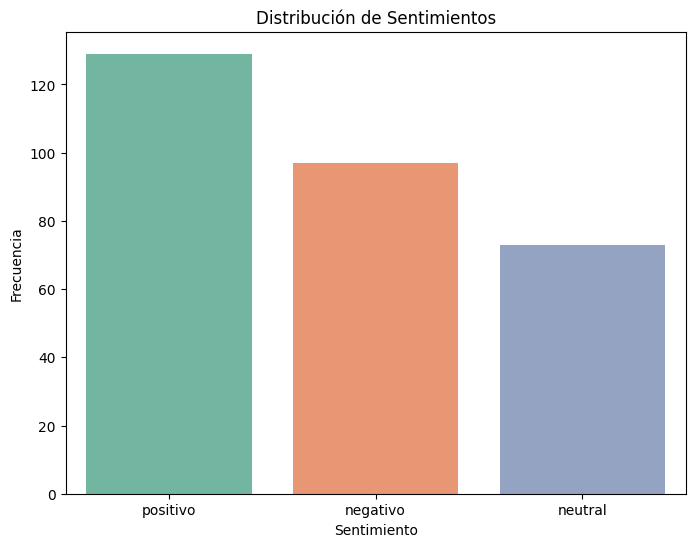

In [ ]:
# Grafico la distribuci√≥n

plt.figure(figsize=(8,6))
sns.countplot(x='Sentimiento', data= df_supplements, palette='Set2')
plt.title('Distribuci√≥n de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.show


In [ ]:
# Revisi√≥n de tipo de datos
df_supplements['Texto'] = df_supplements['Texto'].astype(str)
df_supplements['Sentimiento'] = df_supplements['Sentimiento'].astype(str)

`Longitud del "Texto"`

Anaalizo la longitud de los comentarios para identificar sobre todo si los comentarios son similares en cuanto a longitud entre los "Positivos" y los "Negativos".

- Detectar patrones en cu√°nto al detalle de las cr√≠ticas
- Analizar las criticas cortas o largas en relaci√≥n al sentimiento de la cr√≠tica


count    299.000000
mean       7.053512
std        1.372236
min        3.000000
25%        6.000000
50%        7.000000
75%        8.000000
max       11.000000
Name: longitud_palabras, dtype: float64


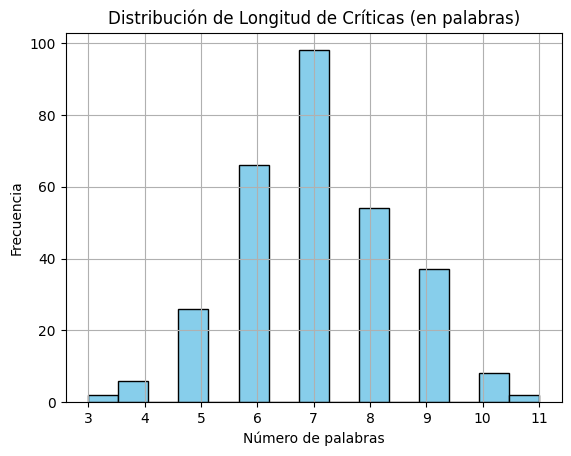

In [ ]:
# Funci√≥n para contar palabras
def contar_palabras(texto):
  return len(texto.split())

# Longitud del texto en palabras
df_supplements["longitud_palabras"] = df_supplements["Texto"].apply(contar_palabras)

# Resumen estad√≠stico
print(df_supplements['longitud_palabras'].describe())

# Gr√°fico de la distribuci√≥n de la longitud en palabras
df_supplements['longitud_palabras'].hist(bins=15, color='skyblue', edgecolor='black')
plt.title('Distribuci√≥n de Longitud de Cr√≠ticas (en palabras)')
plt.xlabel('N√∫mero de palabras')
plt.ylabel('Frecuencia')
plt.show()

Identifico que el promedio de palabras por cr√≠tica es de 7 palabras.

Ahora voy a desarrollar esto:
- Gr√°ficar el promedio de palabras por cr√≠tica de cada tipo de cr√≠tica "Negativa", "Positiva" y "Neutra" para buscar patrones.
Ej. Las cr√≠ticas positivas son mas breves y las negativas son m√°s cortas.
- Analizar las cr√≠ticas m√°s cortas y m√°s largas en relaci√≥n al sentimiento

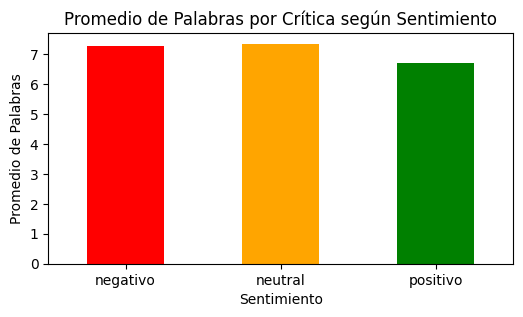

In [ ]:
# Graficar el promedio de palabras por sentimiento
promedio_palabras = df_supplements.groupby('Sentimiento')['longitud_palabras'].mean()

# Graficarlo
promedio_palabras.plot(kind='bar', color=['red','orange','green'],figsize=(6,3))
plt.title('Promedio de Palabras por Cr√≠tica seg√∫n Sentimiento')
plt.xlabel('Sentimiento')
plt.ylabel('Promedio de Palabras')
plt.xticks(rotation=0)
plt.show()


Analizar las cr√≠ticas m√°s cortas y m√°s largas en relaci√≥n al sentimiento (Top 10 de cada una)

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nsmallest.html


In [ ]:
# Cr√≠ticas m√°s cortas (top 10)
criticas_cortas = df_supplements.nsmallest(10, 'longitud_palabras')
print("Cr√≠ticas m√°s cortas (top 10):")
print(criticas_cortas[['Texto', 'longitud_palabras', 'Sentimiento']])

Cr√≠ticas m√°s cortas (top 10):
                                     Texto  longitud_palabras Sentimiento
20       Excelente relaci√≥n calidad-precio                  3    positivo
206      Excelente relaci√≥n precio-calidad                  3    positivo
86               Todo perfecto, sin quejas                  4    positivo
96           Producto promedio, no destaca                  4     neutral
158         Producto incre√≠ble, me encanta                  4    positivo
233    Excelente atenci√≥n, muy profesional                  4    positivo
242           Todo perfecto, lo recomiendo                  4    positivo
262         Me caus√≥ molestias estomacales                  4    negativo
24          El env√≠o tom√≥ demasiado tiempo                  5    negativo
41   Excelente sabor, estoy muy satisfecho                  5    positivo


In [ ]:
# Cr√≠ticas m√°s largas (top 10)
criticas_largas = df_supplements.nlargest(10, 'longitud_palabras')
print("\nCr√≠ticas m√°s largas (top 10):")
print(criticas_largas[['Texto', 'longitud_palabras', 'Sentimiento']])


Cr√≠ticas m√°s largas (top 10):
                                                 Texto  longitud_palabras  \
88   El sabor no est√° mal, pero no lo volver√≠a a co...                 11   
263   El sabor no es lo que esperaba, pero no est√° mal                 11   
14    El tiempo de env√≠o fue m√°s r√°pido de lo esperado                 10   
21       La textura del producto es rara y no me gust√≥                 10   
134       El precio es un poco alto, pero vale la pena                 10   
180  El paquete lleg√≥ con un golpe, pero estaba tod...                 10   
203          El sabor es muy dulce, no es de mi agrado                 10   
205  El paquete lleg√≥ bien, aunque tard√≥ m√°s de lo ...                 10   
217   Me gener√≥ dolor de cabeza, no lo volver√© a tomar                 10   
224     Creo que el precio es justo para lo que ofrece                 10   

    Sentimiento  
88      neutral  
263     neutral  
14     positivo  
21     negativo  
134     neutral 

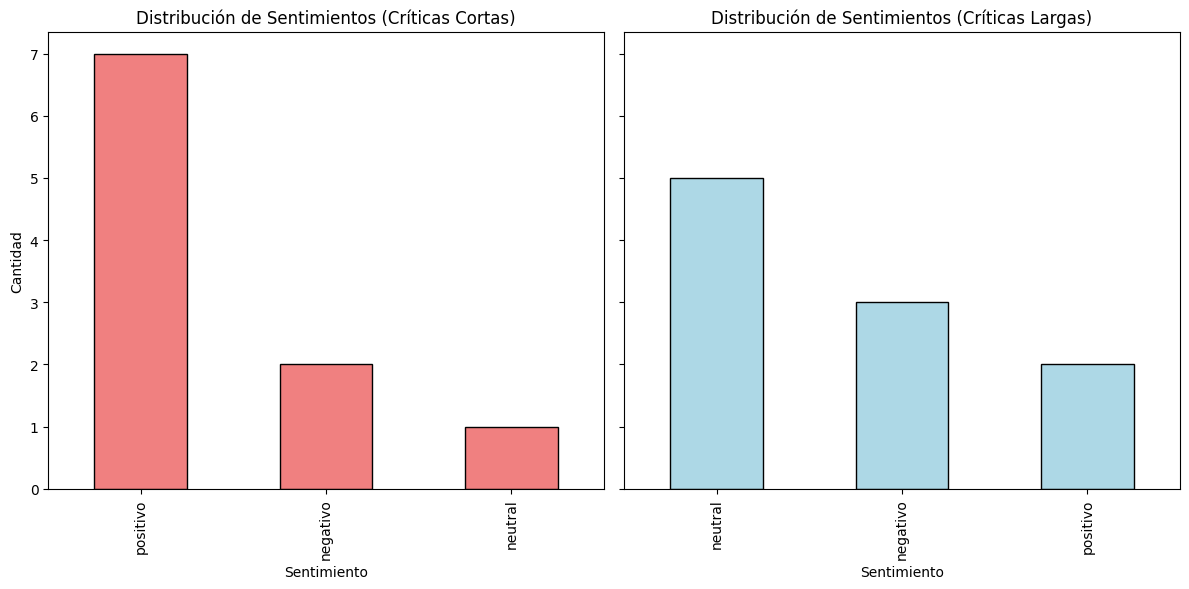

In [ ]:
# Creo una figura con dos gr√°ficos uno al lado del otro
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Distribuci√≥n de sentimientos en cr√≠ticas cortas
criticas_cortas['Sentimiento'].value_counts().plot(
    kind='bar', color='lightcoral', ax=axs[0], edgecolor='black')

# Etiqueta y titulo del primer gr√°fico (Criticas cortas)
axs[0].set_title('Distribuci√≥n de Sentimientos (Cr√≠ticas Cortas)')
axs[0].set_xlabel('Sentimiento')
axs[0].set_ylabel('Cantidad')

# Distribuci√≥n de sentimientos en cr√≠ticas largas
criticas_largas['Sentimiento'].value_counts().plot(
    kind='bar', color='lightblue', ax=axs[1], edgecolor='black')

# T√≠tulo del segundo gr√°fico (Criticas largas)
axs[1].set_title('Distribuci√≥n de Sentimientos (Cr√≠ticas Largas)')
axs[1].set_xlabel('Sentimiento')

plt.tight_layout()
plt.show()

A simple vista se puede ver como las cr√≠ticas m√°s cortas tienen una tendencia de ser positivas.
Y las cr√≠ticas m√°s largas tienen una tendencia de ser neutrales.

---
# Preprocesamiento de Texto

Realizo el preprocesamiento del texto previo al analisis final, Feature Engineering y modelado.
Con el fin de evitar redundancias a la hora de hacer un Word Cloud pero sobre todo hacerlo un texto procesable para el feature engineering posterior y el modelado.

1. `Normalizaci√≥n` (Min√∫sculas, elimino puntuaciones y caracteres especiales (dejo las tildes, √±, n√∫meros y espacios porque considero que puede ser significativo en espa√±ol).
2. Una vez limpio el texto realizo la `Tokenizaci√≥n` para trabajar el texto como lista de palabras y no bloque continuo.
3. Elimino `stopwords` que no generan un valor sem√°ntico.
4.  `Lematizaci√≥n`: Reduzco las palabras a su base para evitar duplicar t√©rminos que tengan un significado similar semanticamente



In [ ]:
# Limpieza y normalizaci√≥n del texto para realizar el Word Cloud

# Inicio el lematizador de NLTK
lemmatizer = WordNetLemmatizer()

# Funci√≥n para limpiar y procesar texto
def clean(texto):
    # Convertir a min√∫scula
    texto = texto.lower()

    # Eliminar puntuaciones y caracteres especiales
    texto = re.sub(r'[^a-z√°√©√≠√≥√∫√º√±0-9\s]+', '', texto)

    # Tokenizaci√≥n
    tokens = word_tokenize(texto)

    # Eliminar stopwords
    tokens = [word for word in tokens if word not in stopwords.words('spanish')]

    # Lematizaci√≥n
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return tokens

# Aplicar la funci√≥n al DataFrame
df_supplements['Tokens'] = df_supplements['Texto'].apply(clean)


In [ ]:
df_supplements.head()

Texto Sentimiento  \
0    El sabor es incre√≠ble, lo mejor que he probado    positivo   
1            Lleg√≥ tarde y el paquete estaba da√±ado    negativo   
2            El precio es razonable para la calidad    positivo   
3  No noto diferencia con otros productos similares     neutral   
4               El env√≠o fue r√°pido y sin problemas    positivo   

   longitud_palabras                                    Tokens  
0                  9        [sabor, incre√≠ble, mejor, probado]  
1                  7           [lleg√≥, tarde, paquete, da√±ado]  
2                  7              [precio, razonable, calidad]  
3                  7  [noto, diferencia, productos, similares]  
4                  7                [env√≠o, r√°pido, problemas]

`WordCloud`

Visualizaci√≥n de las palabras m√°s frecuentes (cualitativamente).
A simple vista son las principales palabras. :
- Sabor
- Producto
- Precio
- Calidad
- Servicio
- llego
- rapido

Entiendo que va de la mano con el desbalance positivo de los comentarios.

A simple vista pareciera que el producto es el principal eje de los comentarios y que el precio, el sabor y la velocidad son las variables m√°s comentadas por los clientes.

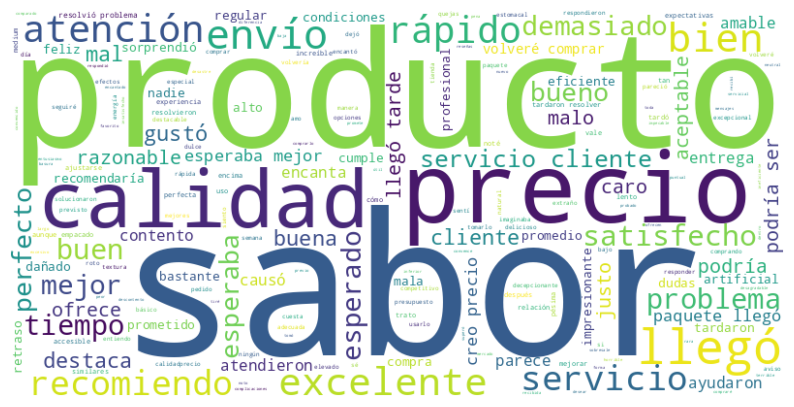

In [ ]:
# Wordcloud para visualizar las palabras m√°s frecuentes en los comentarios de los usuarios
tokens_completos = []

# Unifico todos los tokens para generar el WordCloud
for tokens in df_supplements['Tokens']:
  tokens_completos.extend(tokens)

# Uno todos los tokens en un string
texto_completo = " ".join(tokens_completos)

wordcloud = WordCloud(width=800,height=400,background_color='white').generate(texto_completo)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')  # 'bilinear' para suavizar la imagen
plt.axis('off')  # Quitar los ejes
plt.show()

`CounterVectorizer`

En este caso quiero ver de manera cuantitativa y m√°s detallada la misma repetici√≥n.

Voy a analizar el top 10 de palabras m√°s frecuentas.

De esta manera voy a buscar complementar la Word Cloud con esta herramienta.

Analizando el gr√°fico refuerzo la idea anterior, eje de los comentarios "Producto" y variables principales "Sabor", "Precio", "Entrega" y "Atenci√≥n"

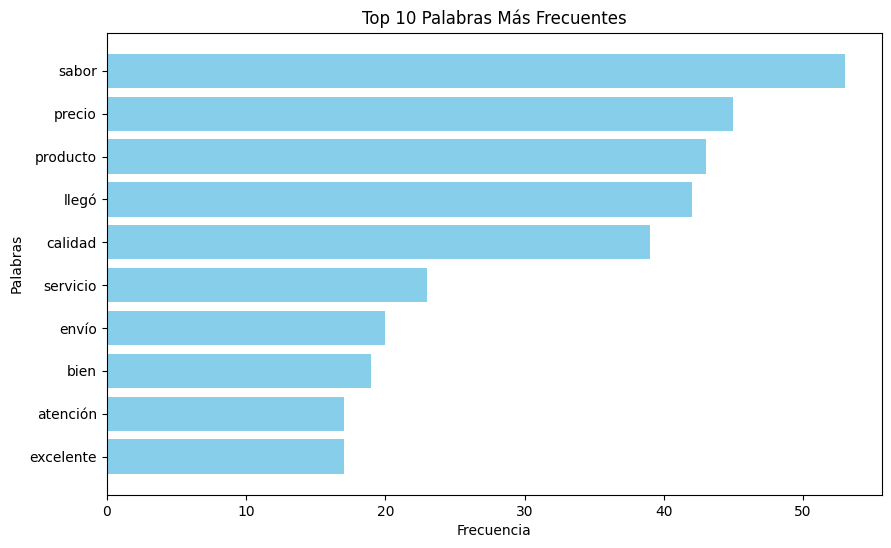

In [ ]:
# CountVectorizer para complementar el √°nalisis de las palabras m√°s frecuentes

# Inicializar el CountVectorizer
vectorizer = CountVectorizer(max_features=10)

# Aplicar el vectorizer al texto completo
X = vectorizer.fit_transform([texto_completo])

# Obtener las palabras y sus frecuencias
palabras = vectorizer.get_feature_names_out()
frecuencias = X.toarray().sum(axis=0)

# Crear un DataFrame para visualizar las palabras m√°s frecuentes
df_palabras = pd.DataFrame({'Palabra': palabras, 'Frecuencia': frecuencias})

# Ordenar el DataFrame por frecuencia en orden descendente
df_palabras = df_palabras.sort_values(by='Frecuencia', ascending=False)

# Visualizar las top 10 palabras m√°s frecuentes
plt.figure(figsize=(10, 6))
plt.barh(df_palabras['Palabra'], df_palabras['Frecuencia'], color='skyblue')
plt.title('Top 10 Palabras M√°s Frecuentes')
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')
plt.gca().invert_yaxis()  # Para que la palabra m√°s frecuente est√© arriba
plt.show()


# Feature Engineering

El objetivo de esta secci√≥n es transformar el texto para que pueda ser interpretado por los algoritmos de ML que voy a usar posteriormente.

Vectorizar el texto (TF-IDF)

In [ ]:
# TF-IDF

Embedding Models

In [ ]:
# Embedding Models

In [ ]:
# Vectorizaci√≥n

In [ ]:
# Codificacion de Sentimientos

In [ ]:
# Divisi√≥n de Dataset

# ETAPA 1: Modelado Predictivo

Realizar research de los siguientes t√©rminos:


## Predicci√≥n de Sentimiento

## Modelado de Topico

## Predicci√≥n de T√≥pico

Research:
- https://medium.com/@daffabercerita/how-to-use-large-language-model-for-topic-modeling-a-comprehensive-guide-6c03d365cc90
-

# ETAPA 2: IA GENERATIVA